# Convolutional Neural Networks 

This notebook will teach you about **Convolutional Neural Networks (CNNs)** - the AI technology that powers image recognition in your smartphone, medical imaging, and autonomous vehicles.

**What we'll learn:**
1. Start with traditional neural networks on handwritten digits (MNIST)
2. Understand why regular networks struggle with larger images
3. Build a Convolutional Neural Network from scratch
4. Compare performance on complex image datasets
5. Visualize what CNNs actually "see" in images

**Why Convolutional Neural Networks?**
- Designed specifically for image data
- Can recognise patterns regardless of where they appear in the image
- Much more efficient than fully connected networks for images
- The foundation of modern computer vision

**What you need:**
- Basic understanding of neural networks

**Instructions:**
- Run each cell one by one
- Read the explanations carefully
- Try changing the parameters to see what happens!

In [6]:
# Import libraries for neural networks and image processing
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# For data analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Set random seeds for reproducible results
np.random.seed(42)
torch.manual_seed(42)

print("🧠 Libraries imported successfully!")
print("🎯 Ready to explore Convolutional Neural Networks!")
print("🔥 PyTorch version:", torch.__version__)
print("📸 TorchVision version:", torchvision.__version__)

🧠 Libraries imported successfully!
🎯 Ready to explore Convolutional Neural Networks!
🔥 PyTorch version: 2.7.1
📸 TorchVision version: 0.22.1


## Part 1: Traditional Neural Networks with MNIST Handwritten Digits

Let's start with the classic MNIST dataset - 28x28 pixel images of handwritten digits (0-9). This is perfect for understanding the basics before moving to more complex images.

**The MNIST Dataset:**
- 60,000 training images + 10,000 test images
- Each image is 28×28 pixels (784 pixels total)
- Grayscale images (just black and white)
- 10 classes (digits 0-9)

First, let's load and explore the data.

In [7]:
# Load MNIST dataset
print("📁 Loading MNIST handwritten digit dataset...")

# Define transformations (convert to tensor and normalize)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

# Load training and test data
train_dataset = torchvision.datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

test_dataset = torchvision.datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"✅ MNIST dataset loaded successfully!")
print(f"📊 Training samples: {len(train_dataset)}")
print(f"📊 Test samples: {len(test_dataset)}")
print(f"🎯 Number of classes: 10 (digits 0-9)")

📁 Loading MNIST handwritten digit dataset...


100.0%
100.0%
100.0%
100.0%

✅ MNIST dataset loaded successfully!
📊 Training samples: 60000
📊 Test samples: 10000
🎯 Number of classes: 10 (digits 0-9)


👀 Let's see some handwritten digits from our dataset:


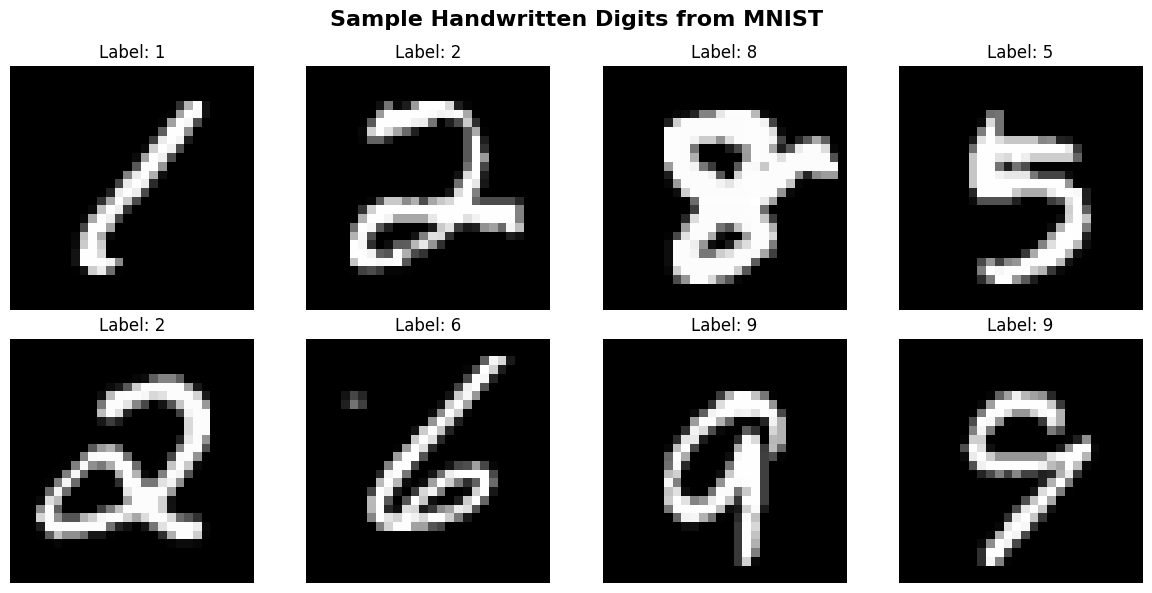


📏 Image dimensions: torch.Size([1, 28, 28])
   - Channels: 1 (grayscale)
   - Height: 28 pixels
   - Width: 28 pixels
   - Total pixels per image: 784


In [8]:
# Let's visualize some handwritten digits
print("👀 Let's see some handwritten digits from our dataset:")

# Get a batch of training data
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Create a subplot to show 8 images
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle('Sample Handwritten Digits from MNIST', fontsize=16, fontweight='bold')

for i in range(8):
    row = i // 4
    col = i % 4
    
    # Convert tensor to numpy and reshape
    img = images[i].squeeze().numpy()
    
    axes[row, col].imshow(img, cmap='gray')
    axes[row, col].set_title(f'Label: {labels[i].item()}', fontsize=12)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Show image dimensions
print(f"\n📏 Image dimensions: {images[0].shape}")
print(f"   - Channels: {images[0].shape[0]} (grayscale)")
print(f"   - Height: {images[0].shape[1]} pixels")
print(f"   - Width: {images[0].shape[2]} pixels")
print(f"   - Total pixels per image: {images[0].shape[1] * images[0].shape[2]}")

## Building a Traditional Fully Connected Neural Network

Now let's build a traditional (fully connected) neural network for MNIST. This will help us understand the limitations before we move to CNNs.

**How it works:**
1. **Flatten** the 28×28 image into a single row of 784 pixels
2. **Feed** all pixels through fully connected layers
3. **Classify** into one of 10 digit classes

**The challenge:** This approach treats each pixel independently and ignores spatial relationships!

In [9]:
# Build a traditional fully connected neural network
class FullyConnectedNetwork(nn.Module):
    def __init__(self):
        super(FullyConnectedNetwork, self).__init__()
        
        # Input: 28*28 = 784 pixels
        # Hidden layers with ReLU activation
        # Output: 10 classes (digits 0-9)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 512)  # First hidden layer
        self.fc2 = nn.Linear(512, 256)  # Second hidden layer
        self.fc3 = nn.Linear(256, 128)  # Third hidden layer
        self.fc4 = nn.Linear(128, 10)   # Output layer
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)  # Prevent overfitting
        
    def forward(self, x):
        x = self.flatten(x)  # Flatten 28x28 image to 784 pixels
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Create the model
fc_model = FullyConnectedNetwork()

# Count parameters
total_params = sum(p.numel() for p in fc_model.parameters())
print(f"🧠 Fully Connected Network created!")
print(f"📊 Total parameters: {total_params:,}")
print(f"🏗️  Architecture: 784 → 512 → 256 → 128 → 10")
print(f"💡 How it works: Flattens image → processes all pixels together")

🧠 Fully Connected Network created!
📊 Total parameters: 567,434
🏗️  Architecture: 784 → 512 → 256 → 128 → 10
💡 How it works: Flattens image → processes all pixels together


In [10]:
# Train the fully connected network
print("🚂 Training the Fully Connected Network...")

# Setup training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
fc_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(fc_model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
fc_train_losses = []
fc_train_accuracies = []

for epoch in range(num_epochs):
    fc_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = fc_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        
        if batch_idx % 200 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}, '
                  f'Loss: {loss.item():.4f}, '
                  f'Accuracy: {100.*correct/total:.2f}%')
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    fc_train_losses.append(epoch_loss)
    fc_train_accuracies.append(epoch_acc)
    
    print(f'Epoch {epoch+1} completed - Average Loss: {epoch_loss:.4f}, '
          f'Training Accuracy: {epoch_acc:.2f}%')

print("\n✅ Fully Connected Network training completed!")

🚂 Training the Fully Connected Network...
Epoch 1/5, Batch 0, Loss: 2.3002, Accuracy: 10.94%
Epoch 1/5, Batch 200, Loss: 0.2229, Accuracy: 82.70%
Epoch 1/5, Batch 400, Loss: 0.2082, Accuracy: 87.78%
Epoch 1/5, Batch 600, Loss: 0.1050, Accuracy: 89.88%
Epoch 1/5, Batch 800, Loss: 0.1874, Accuracy: 90.99%
Epoch 1 completed - Average Loss: 0.2729, Training Accuracy: 91.64%
Epoch 2/5, Batch 0, Loss: 0.1497, Accuracy: 96.88%
Epoch 2/5, Batch 200, Loss: 0.0237, Accuracy: 95.97%
Epoch 2/5, Batch 400, Loss: 0.0299, Accuracy: 96.20%
Epoch 2/5, Batch 600, Loss: 0.1468, Accuracy: 96.19%
Epoch 2/5, Batch 800, Loss: 0.1091, Accuracy: 96.27%
Epoch 2 completed - Average Loss: 0.1246, Training Accuracy: 96.32%
Epoch 3/5, Batch 0, Loss: 0.0559, Accuracy: 98.44%
Epoch 3/5, Batch 200, Loss: 0.0660, Accuracy: 96.98%
Epoch 3/5, Batch 400, Loss: 0.1293, Accuracy: 96.93%
Epoch 3/5, Batch 600, Loss: 0.1115, Accuracy: 96.91%
Epoch 3/5, Batch 800, Loss: 0.0611, Accuracy: 96.90%
Epoch 3 completed - Average Loss:

🎯 Testing the Fully Connected Network...
✅ Fully Connected Network Test Accuracy: 97.84%


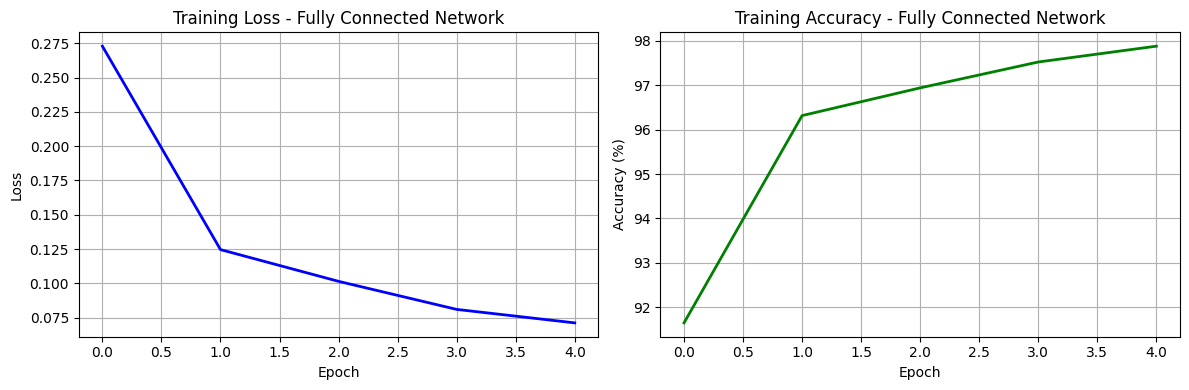

In [11]:
# Test the fully connected network
print("🎯 Testing the Fully Connected Network...")

fc_model.eval()
correct = 0
total = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = fc_model(data)
        _, predicted = torch.max(output, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(target.cpu().numpy())

fc_accuracy = 100 * correct / total
print(f"✅ Fully Connected Network Test Accuracy: {fc_accuracy:.2f}%")

# Plot training progress
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(fc_train_losses, 'b-', linewidth=2)
plt.title('Training Loss - Fully Connected Network')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(fc_train_accuracies, 'g-', linewidth=2)
plt.title('Training Accuracy - Fully Connected Network')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

## Part 2: Understanding the Problem with Larger Images

MNIST works reasonably well with fully connected networks because the images are small (28×28 = 784 pixels). But what happens with larger, more complex images?

**Let's consider a typical smartphone photo:**
- Size: 1920×1080 pixels = 2,073,600 pixels
- If we used a fully connected network, we'd need 2,073,600 input neurons!
- Even a small hidden layer of 1000 neurons would require 2 billion connections!

**The problems:**
1. **Too many parameters** - leads to overfitting
2. **Ignores spatial structure** - treats neighboring pixels the same as distant ones
3. **Not translation invariant** - can't recognize objects in different positions
4. **Computationally expensive** - impossible to train efficiently

This is where **Convolutional Neural Networks** come to the rescue!

## Part 3: Convolutional Neural Networks - A Better Approach

**Convolutional Neural Networks (CNNs)** are specifically designed for image data. They solve the problems we just discussed by:

1. **Using convolution operations** instead of full connections
2. **Preserving spatial relationships** between pixels
3. **Sharing parameters** across the image (much fewer parameters)
4. **Being translation invariant** - can recognize objects anywhere in the image

**Key Components:**
- **Convolutional layers** - detect features using filters/kernels
- **Pooling layers** - reduce size while keeping important information
- **Activation functions** - add non-linearity (usually ReLU)
- **Fully connected layers** - final classification (only at the end)

Let's build a CNN for MNIST first, then move to a more complex dataset.

In [12]:
# Build a Convolutional Neural Network for MNIST
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Input: 1 channel, Output: 32 channels
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # Input: 32 channels, Output: 64 channels
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # Input: 64 channels, Output: 128 channels
        
        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)  # Reduces size by half
        
        # Fully connected layers (only at the end)
        self.fc1 = nn.Linear(128 * 3 * 3, 512)  # After 3 pooling operations: 28->14->7->3
        self.fc2 = nn.Linear(512, 10)
        
        # Activation and regularization
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        # Convolutional + pooling layers
        x = self.pool(self.relu(self.conv1(x)))  # 28x28 -> 14x14
        x = self.pool(self.relu(self.conv2(x)))  # 14x14 -> 7x7
        x = self.pool(self.relu(self.conv3(x)))  # 7x7 -> 3x3
        
        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

# Create the CNN model
cnn_model = ConvolutionalNetwork()

# Count parameters
cnn_total_params = sum(p.numel() for p in cnn_model.parameters())
print(f"🧠 Convolutional Neural Network created!")
print(f"📊 Total parameters: {cnn_total_params:,}")
print(f"🏗️  Architecture: Conv layers → Pooling → Fully connected")
print(f"💡 How it works: Detects features → Reduces size → Classifies")
print(f"🎯 Parameter comparison: CNN has {cnn_total_params:,} vs FC has {total_params:,}")

🧠 Convolutional Neural Network created!
📊 Total parameters: 688,138
🏗️  Architecture: Conv layers → Pooling → Fully connected
💡 How it works: Detects features → Reduces size → Classifies
🎯 Parameter comparison: CNN has 688,138 vs FC has 567,434


In [13]:
# Train the CNN
print("🚂 Training the Convolutional Neural Network...")

# Setup training
cnn_model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
cnn_train_losses = []
cnn_train_accuracies = []

for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = cnn_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        
        if batch_idx % 200 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}, '
                  f'Loss: {loss.item():.4f}, '
                  f'Accuracy: {100.*correct/total:.2f}%')
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    cnn_train_losses.append(epoch_loss)
    cnn_train_accuracies.append(epoch_acc)
    
    print(f'Epoch {epoch+1} completed - Average Loss: {epoch_loss:.4f}, '
          f'Training Accuracy: {epoch_acc:.2f}%')

print("\n✅ CNN training completed!")

🚂 Training the Convolutional Neural Network...
Epoch 1/5, Batch 0, Loss: 2.3091, Accuracy: 7.81%
Epoch 1/5, Batch 200, Loss: 0.2726, Accuracy: 88.08%
Epoch 1/5, Batch 400, Loss: 0.1626, Accuracy: 92.47%
Epoch 1/5, Batch 600, Loss: 0.0477, Accuracy: 94.18%
Epoch 1/5, Batch 800, Loss: 0.0280, Accuracy: 95.15%
Epoch 1 completed - Average Loss: 0.1374, Training Accuracy: 95.63%
Epoch 2/5, Batch 0, Loss: 0.0062, Accuracy: 100.00%
Epoch 2/5, Batch 200, Loss: 0.0247, Accuracy: 98.83%
Epoch 2/5, Batch 400, Loss: 0.0082, Accuracy: 98.72%
Epoch 2/5, Batch 600, Loss: 0.0685, Accuracy: 98.66%
Epoch 2/5, Batch 800, Loss: 0.0055, Accuracy: 98.65%
Epoch 2 completed - Average Loss: 0.0427, Training Accuracy: 98.70%
Epoch 3/5, Batch 0, Loss: 0.0187, Accuracy: 98.44%
Epoch 3/5, Batch 200, Loss: 0.0025, Accuracy: 99.10%
Epoch 3/5, Batch 400, Loss: 0.0102, Accuracy: 99.01%
Epoch 3/5, Batch 600, Loss: 0.0085, Accuracy: 99.03%
Epoch 3/5, Batch 800, Loss: 0.0112, Accuracy: 99.03%
Epoch 3 completed - Average 

🎯 Testing the Convolutional Neural Network...
✅ CNN Test Accuracy: 99.01%

📊 MNIST Results Comparison:
   Fully Connected Network: 97.84%
   Convolutional Network:   99.01%
   Improvement: 1.17 percentage points


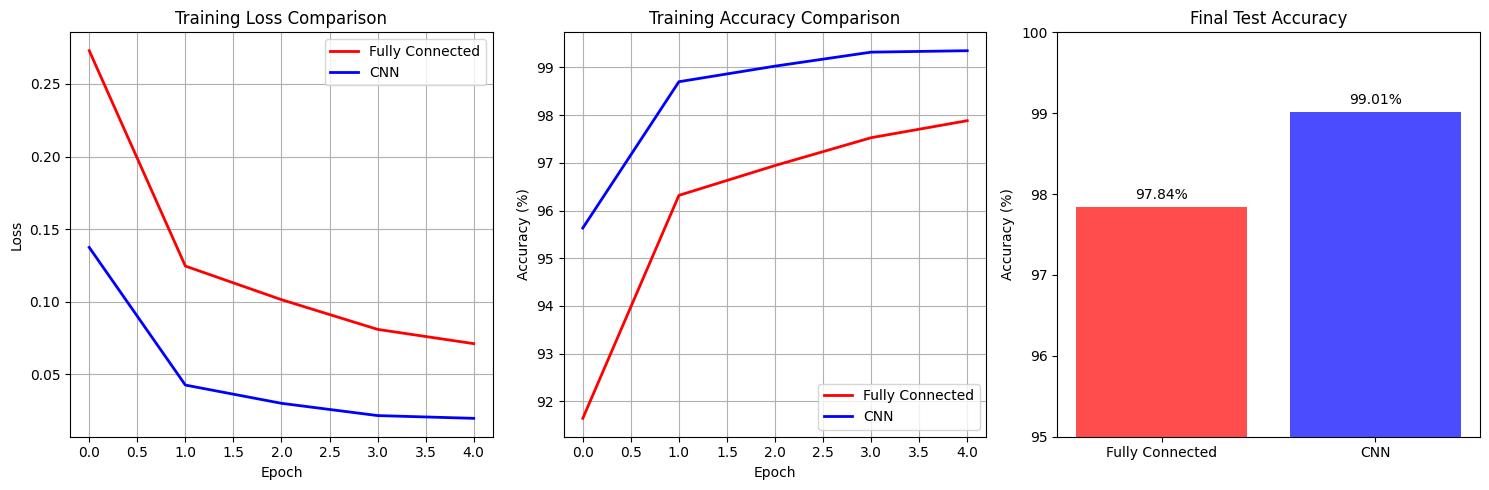

In [14]:
# Test the CNN
print("🎯 Testing the Convolutional Neural Network...")

cnn_model.eval()
correct = 0
total = 0
cnn_predictions = []
cnn_labels = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = cnn_model(data)
        _, predicted = torch.max(output, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        
        cnn_predictions.extend(predicted.cpu().numpy())
        cnn_labels.extend(target.cpu().numpy())

cnn_accuracy = 100 * correct / total
print(f"✅ CNN Test Accuracy: {cnn_accuracy:.2f}%")

# Compare with fully connected network
print(f"\n📊 MNIST Results Comparison:")
print(f"   Fully Connected Network: {fc_accuracy:.2f}%")
print(f"   Convolutional Network:   {cnn_accuracy:.2f}%")
print(f"   Improvement: {cnn_accuracy - fc_accuracy:.2f} percentage points")

# Plot training comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(fc_train_losses, 'r-', label='Fully Connected', linewidth=2)
plt.plot(cnn_train_losses, 'b-', label='CNN', linewidth=2)
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(fc_train_accuracies, 'r-', label='Fully Connected', linewidth=2)
plt.plot(cnn_train_accuracies, 'b-', label='CNN', linewidth=2)
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
models = ['Fully Connected', 'CNN']
accuracies = [fc_accuracy, cnn_accuracy]
colors = ['red', 'blue']
plt.bar(models, accuracies, color=colors, alpha=0.7)
plt.title('Final Test Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(95, 100)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.1, f'{acc:.2f}%', ha='center')

plt.tight_layout()
plt.show()

## Part 4: Real-World Application - CIFAR-10 Color Images

Now let's see where CNNs really shine! We'll use CIFAR-10, a dataset of 32×32 color images with 10 different classes.

**CIFAR-10 Dataset:**
- 60,000 color images (32×32 pixels, 3 channels)
- 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
- Much more challenging than MNIST!
- More realistic representation of real-world image classification

**Why CNNs excel here:**
- Color images have 3 channels (RGB)
- More complex patterns and textures
- Objects can appear in different positions and orientations
- Traditional neural networks would need 32×32×3 = 3,072 input neurons!

In [15]:
# Load CIFAR-10 dataset
print("📁 Loading CIFAR-10 color image dataset...")

# Define transformations for CIFAR-10
cifar_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # ImageNet standards
])

# Load CIFAR-10 data
cifar_train = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform=cifar_transform
)

cifar_test = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False, 
    download=True, 
    transform=cifar_transform
)

# Create data loaders
cifar_train_loader = DataLoader(cifar_train, batch_size=64, shuffle=True)
cifar_test_loader = DataLoader(cifar_test, batch_size=64, shuffle=False)

# CIFAR-10 class names
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(f"✅ CIFAR-10 dataset loaded successfully!")
print(f"📊 Training samples: {len(cifar_train)}")
print(f"📊 Test samples: {len(cifar_test)}")
print(f"🎯 Classes: {classes}")

📁 Loading CIFAR-10 color image dataset...


100.0%


✅ CIFAR-10 dataset loaded successfully!
📊 Training samples: 50000
📊 Test samples: 10000
🎯 Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


👀 Let's see some color images from CIFAR-10:


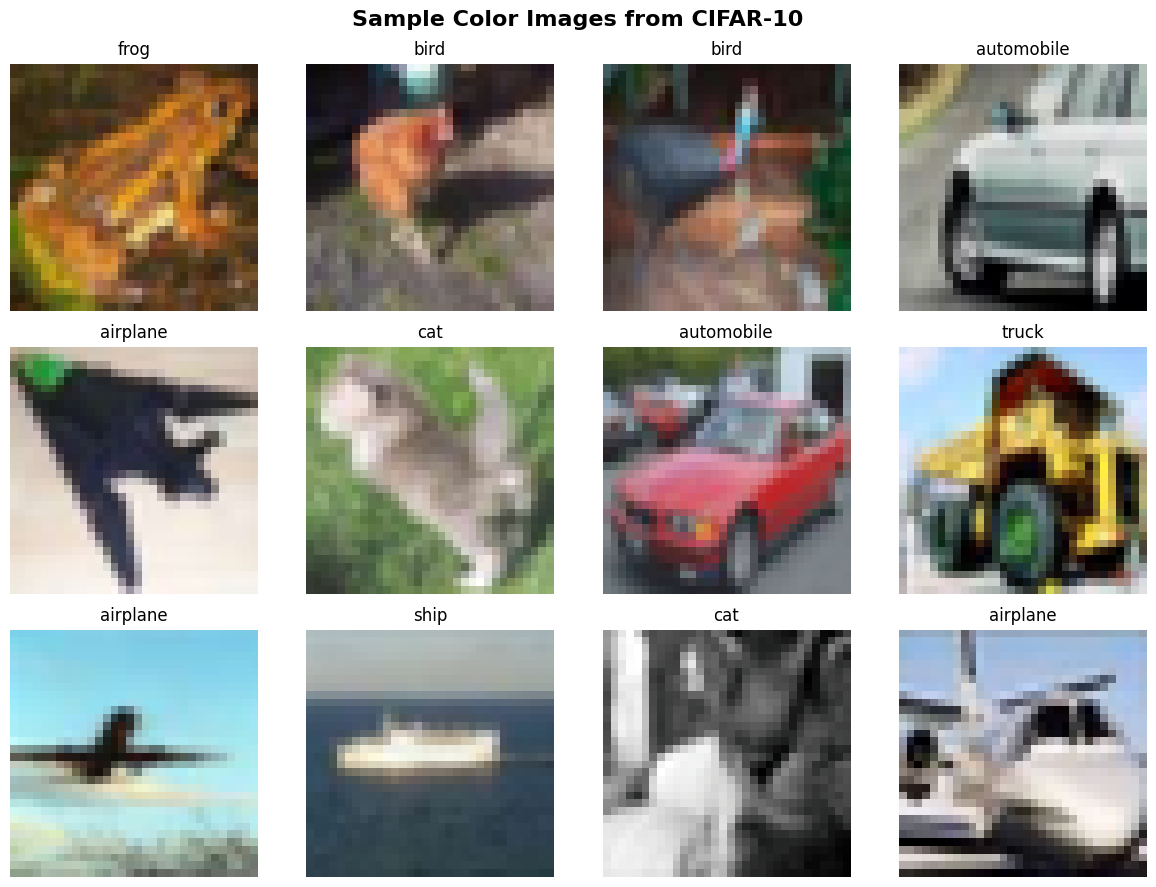


📏 CIFAR-10 image dimensions: torch.Size([3, 32, 32])
   - Channels: 3 (RGB color)
   - Height: 32 pixels
   - Width: 32 pixels
   - Total pixels per image: 3072
   - Compare to MNIST: 3072 vs 784 pixels


In [16]:
# Visualize CIFAR-10 images
print("👀 Let's see some color images from CIFAR-10:")

# Get a batch of training data
cifar_iter = iter(cifar_train_loader)
images, labels = next(cifar_iter)

# Create a subplot to show 12 images
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle('Sample Color Images from CIFAR-10', fontsize=16, fontweight='bold')

for i in range(12):
    row = i // 4
    col = i % 4
    
    # Convert tensor to numpy and denormalize
    img = images[i].permute(1, 2, 0)  # Change from CHW to HWW format
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    img = torch.clamp(img, 0, 1)
    
    axes[row, col].imshow(img)
    axes[row, col].set_title(f'{classes[labels[i]]}', fontsize=12)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Show image dimensions
print(f"\n📏 CIFAR-10 image dimensions: {images[0].shape}")
print(f"   - Channels: {images[0].shape[0]} (RGB color)")
print(f"   - Height: {images[0].shape[1]} pixels")
print(f"   - Width: {images[0].shape[2]} pixels")
print(f"   - Total pixels per image: {images[0].shape[1] * images[0].shape[2] * images[0].shape[0]}")
print(f"   - Compare to MNIST: {images[0].shape[1] * images[0].shape[2] * images[0].shape[0]} vs 784 pixels")

In [17]:
# Build a more sophisticated CNN for CIFAR-10
class CIFAR10_CNN(nn.Module):
    def __init__(self):
        super(CIFAR10_CNN, self).__init__()
        
        # First block: Input 32x32x3
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)   # 32x32x32
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)  # 32x32x32
        self.pool1 = nn.MaxPool2d(2, 2)               # 16x16x32
        
        # Second block
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)  # 16x16x64
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)  # 16x16x64
        self.pool2 = nn.MaxPool2d(2, 2)               # 8x8x64
        
        # Third block
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1) # 8x8x128
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1) # 8x8x128
        self.pool3 = nn.MaxPool2d(2, 2)               # 4x4x128
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
        
        # Activation and regularization
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        # First block
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool1(x)
        x = self.dropout(x)
        
        # Second block
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.pool2(x)
        x = self.dropout(x)
        
        # Third block
        x = self.relu(self.conv5(x))
        x = self.relu(self.conv6(x))
        x = self.pool3(x)
        x = self.dropout(x)
        
        # Flatten and classify
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

# Create the CIFAR-10 CNN
cifar_cnn = CIFAR10_CNN()
cifar_cnn.to(device)

# Count parameters
cifar_params = sum(p.numel() for p in cifar_cnn.parameters())
print(f"🧠 CIFAR-10 CNN created!")
print(f"📊 Total parameters: {cifar_params:,}")
print(f"🏗️  Architecture: More complex CNN with multiple conv blocks")
print(f"💡 Designed for color images with more complex patterns")

🧠 CIFAR-10 CNN created!
📊 Total parameters: 1,341,226
🏗️  Architecture: More complex CNN with multiple conv blocks
💡 Designed for color images with more complex patterns


In [18]:
# Train the CIFAR-10 CNN
print("🚂 Training the CIFAR-10 CNN...")
print("⏰ This will take longer due to more complex images and network...")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cifar_cnn.parameters(), lr=0.001)

# Training loop (fewer epochs due to complexity)
num_epochs = 10
cifar_train_losses = []
cifar_train_accuracies = []

for epoch in range(num_epochs):
    cifar_cnn.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(cifar_train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = cifar_cnn(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        
        if batch_idx % 200 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}, '
                  f'Loss: {loss.item():.4f}, '
                  f'Accuracy: {100.*correct/total:.2f}%')
    
    epoch_loss = running_loss / len(cifar_train_loader)
    epoch_acc = 100. * correct / total
    cifar_train_losses.append(epoch_loss)
    cifar_train_accuracies.append(epoch_acc)
    
    print(f'Epoch {epoch+1} completed - Average Loss: {epoch_loss:.4f}, '
          f'Training Accuracy: {epoch_acc:.2f}%')

print("\n✅ CIFAR-10 CNN training completed!")

🚂 Training the CIFAR-10 CNN...
⏰ This will take longer due to more complex images and network...
Epoch 1/10, Batch 0, Loss: 2.3013, Accuracy: 9.38%
Epoch 1/10, Batch 200, Loss: 1.5314, Accuracy: 26.35%
Epoch 1/10, Batch 400, Loss: 1.3202, Accuracy: 33.47%
Epoch 1/10, Batch 600, Loss: 1.1389, Accuracy: 37.98%
Epoch 1 completed - Average Loss: 1.5854, Training Accuracy: 41.09%
Epoch 2/10, Batch 0, Loss: 1.2181, Accuracy: 54.69%
Epoch 2/10, Batch 200, Loss: 1.1743, Accuracy: 55.94%
Epoch 2/10, Batch 400, Loss: 1.1170, Accuracy: 57.67%
Epoch 2/10, Batch 600, Loss: 1.1460, Accuracy: 59.13%
Epoch 2 completed - Average Loss: 1.1149, Training Accuracy: 60.15%
Epoch 3/10, Batch 0, Loss: 1.4769, Accuracy: 48.44%
Epoch 3/10, Batch 200, Loss: 0.9428, Accuracy: 65.24%
Epoch 3/10, Batch 400, Loss: 0.8260, Accuracy: 66.00%
Epoch 3/10, Batch 600, Loss: 1.0039, Accuracy: 66.63%
Epoch 3 completed - Average Loss: 0.9322, Training Accuracy: 67.04%
Epoch 4/10, Batch 0, Loss: 0.9090, Accuracy: 59.38%
Epoch 

KeyboardInterrupt: 

🎯 Testing the CIFAR-10 CNN...
✅ CIFAR-10 CNN Test Accuracy: 75.53%

📊 Per-class accuracy:
   airplane    : 75.00%
   automobile  : 86.30%
   bird        : 58.90%
   cat         : 52.30%
   deer        : 75.20%
   dog         : 72.10%
   frog        : 82.30%
   horse       : 75.80%
   ship        : 91.00%
   truck       : 86.40%


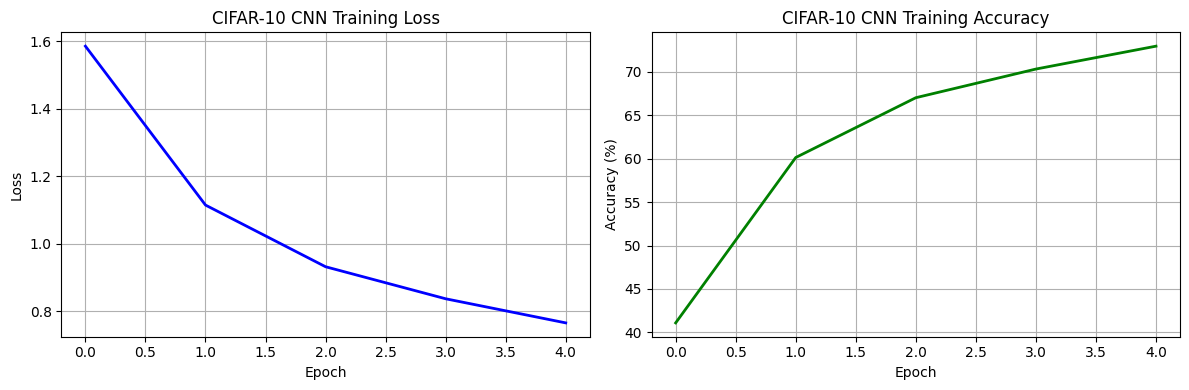

In [19]:
# Test the CIFAR-10 CNN
print("🎯 Testing the CIFAR-10 CNN...")

cifar_cnn.eval()
correct = 0
total = 0
class_correct = [0] * 10
class_total = [0] * 10

with torch.no_grad():
    for data, target in cifar_test_loader:
        data, target = data.to(device), target.to(device)
        output = cifar_cnn(data)
        _, predicted = torch.max(output, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        
        # Calculate per-class accuracy
        for i in range(target.size(0)):
            label = target[i]
            class_correct[label] += (predicted[i] == target[i]).item()
            class_total[label] += 1

cifar_accuracy = 100 * correct / total
print(f"✅ CIFAR-10 CNN Test Accuracy: {cifar_accuracy:.2f}%")

# Show per-class accuracy
print(f"\n📊 Per-class accuracy:")
for i in range(10):
    if class_total[i] > 0:
        acc = 100 * class_correct[i] / class_total[i]
        print(f"   {classes[i]:<12}: {acc:.2f}%")

# Plot training progress
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cifar_train_losses, 'b-', linewidth=2)
plt.title('CIFAR-10 CNN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(cifar_train_accuracies, 'g-', linewidth=2)
plt.title('CIFAR-10 CNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

🔍 Let's see how our CNN performs on test images:


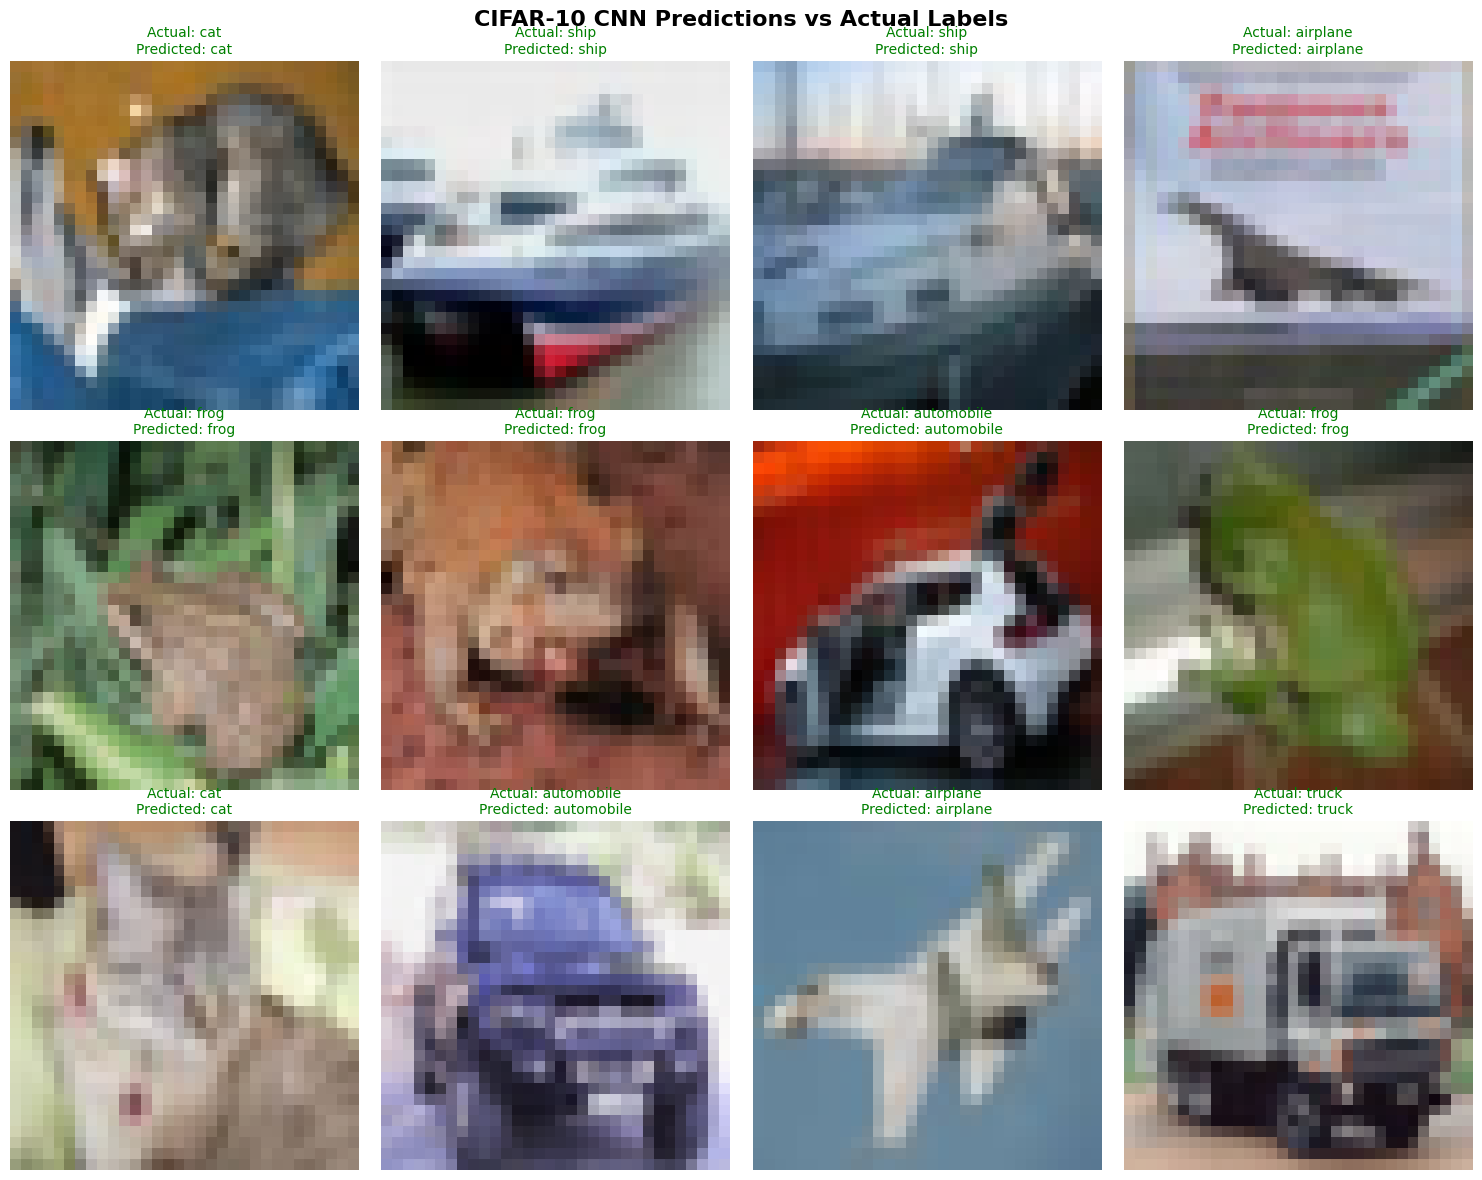

In [20]:
# Show some test predictions
print("🔍 Let's see how our CNN performs on test images:")

# Get a batch of test data
cifar_cnn.eval()
test_iter = iter(cifar_test_loader)
images, labels = next(test_iter)

# Make predictions
with torch.no_grad():
    images_gpu = images.to(device)
    outputs = cifar_cnn(images_gpu)
    _, predictions = torch.max(outputs, 1)

# Show results
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
fig.suptitle('CIFAR-10 CNN Predictions vs Actual Labels', fontsize=16, fontweight='bold')

for i in range(12):
    row = i // 4
    col = i % 4
    
    # Prepare image for display
    img = images[i].permute(1, 2, 0)
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    img = torch.clamp(img, 0, 1)
    
    # Show image
    axes[row, col].imshow(img)
    
    # Create title with prediction and actual
    actual = classes[labels[i]]
    predicted = classes[predictions[i]]
    color = 'green' if actual == predicted else 'red'
    
    axes[row, col].set_title(f'Actual: {actual}\nPredicted: {predicted}', 
                            fontsize=10, color=color)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## Part 5: Understanding What CNNs Learn

One of the fascinating aspects of CNNs is that we can visualize what they learn! Let's look at the filters (kernels) in our trained network.

**What are filters?**
- Small matrices that detect specific features
- Early layers detect edges, lines, and simple patterns
- Deeper layers detect more complex features like shapes and objects
- Each filter learns to recognize a specific type of pattern

Let's visualize some filters from our trained CIFAR-10 CNN.

Here we get the filters from the second convolutional layer 'conv2' - change this to see the other layers!

🔍 Let's see what our CNN actually detects in real images!
Analyzing image: cat


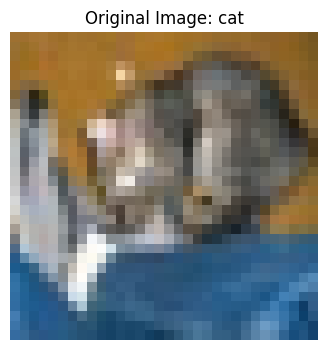

Feature maps shape: torch.Size([1, 32, 32, 32])
We have 32 feature maps, each is 32×32 pixels


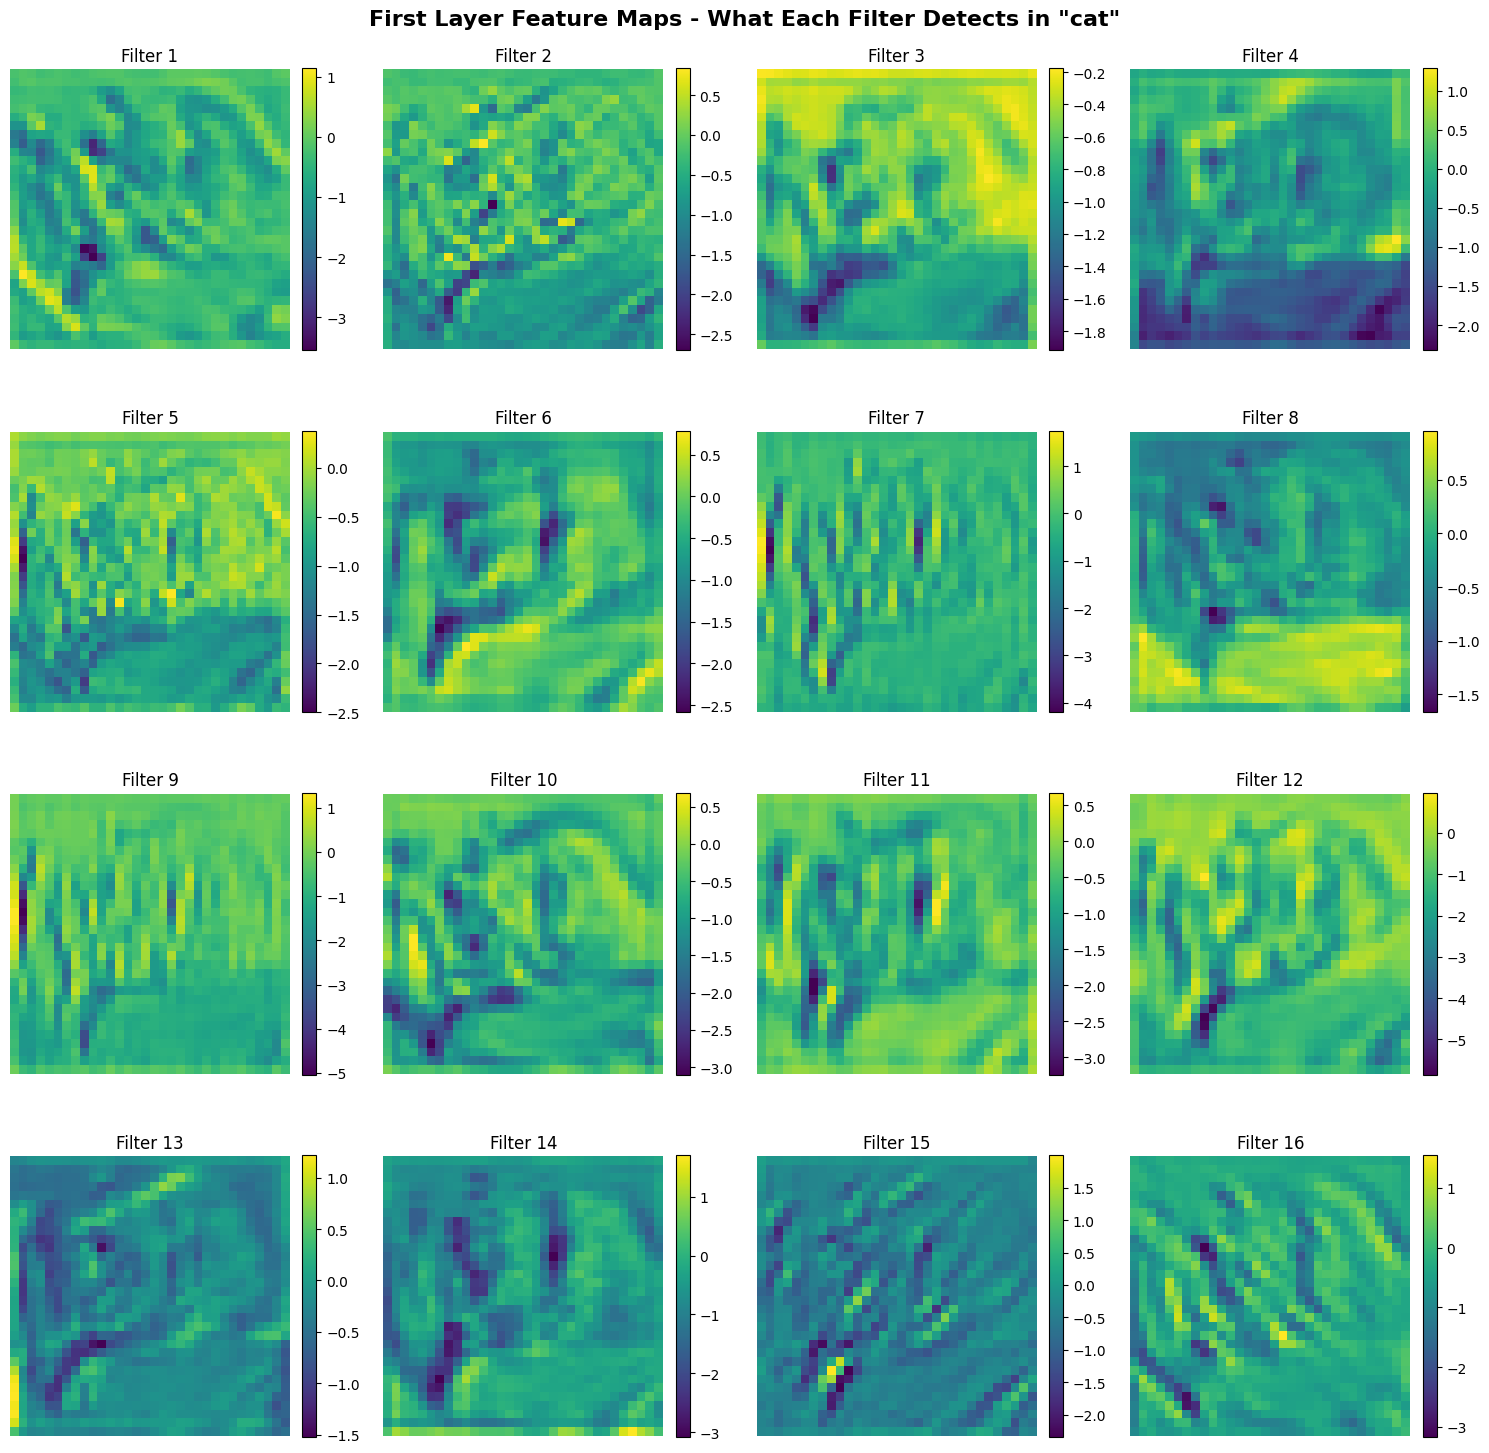

💡 What you're seeing:
   - Bright areas = high activation (filter detected its pattern)
   - Dark areas = low activation (filter didn't find its pattern)
   - Each filter specializes in different features!
   - Some detect edges, others detect textures, colors, or shapes


In [28]:
# Visualize what CNNs learn - Feature Maps (much more informative!)
print("🔍 Let's see what our CNN actually detects in real images!")

# Get a sample image from CIFAR-10
cifar_cnn.eval()
test_iter = iter(cifar_test_loader)
sample_images, sample_labels = next(test_iter)

# Take the first image
sample_image = sample_images[0:1].to(device)  # Keep batch dimension
sample_label = classes[sample_labels[0]]

print(f"Analyzing image: {sample_label}")

# Show the original image
original_img = sample_images[0].permute(1, 2, 0)
original_img = original_img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
original_img = torch.clamp(original_img, 0, 1)

plt.figure(figsize=(4, 4))
plt.imshow(original_img)
plt.title(f'Original Image: {sample_label}')
plt.axis('off')
plt.show()

# Extract feature maps from the first convolutional layer
def get_feature_maps(model, x, layer_name):
    """Extract feature maps from a specific layer"""
    activation = {}
    
    def hook(model, input, output):
        activation[layer_name] = output.detach()
    
    # Register hook
    if layer_name == 'conv1':
        handle = model.conv1.register_forward_hook(hook)
    elif layer_name == 'conv2':
        handle = model.conv2.register_forward_hook(hook)
    elif layer_name == 'conv3':
        handle = model.conv3.register_forward_hook(hook)
    
    # Forward pass
    model(x)
    
    # Remove hook
    handle.remove()
    
    return activation[layer_name]

# Get feature maps from second convolutional layer
feature_maps = get_feature_maps(cifar_cnn, sample_image, 'conv2')
print(f"Feature maps shape: {feature_maps.shape}")
print(f"We have {feature_maps.shape[1]} feature maps, each is {feature_maps.shape[2]}×{feature_maps.shape[3]} pixels")

# Visualize the first 16 feature maps
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle(f'First Layer Feature Maps - What Each Filter Detects in "{sample_label}"', fontsize=16, fontweight='bold')

for i in range(16):
    row = i // 4
    col = i % 4
    
    # Get the feature map
    feature_map = feature_maps[0, i].cpu().numpy()
    
    # Show the feature map
    im = axes[row, col].imshow(feature_map, cmap='viridis')
    axes[row, col].set_title(f'Filter {i+1}', fontsize=12)
    axes[row, col].axis('off')
    
    # Add colorbar to show activation strength
    plt.colorbar(im, ax=axes[row, col], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

print("💡 What you're seeing:")
print("   - Bright areas = high activation (filter detected its pattern)")
print("   - Dark areas = low activation (filter didn't find its pattern)")
print("   - Each filter specializes in different features!")
print("   - Some detect edges, others detect textures, colors, or shapes")

🔍 Comparing how filters respond to different image types:
Found images for: ['cat', 'airplane', 'automobile', 'bird']


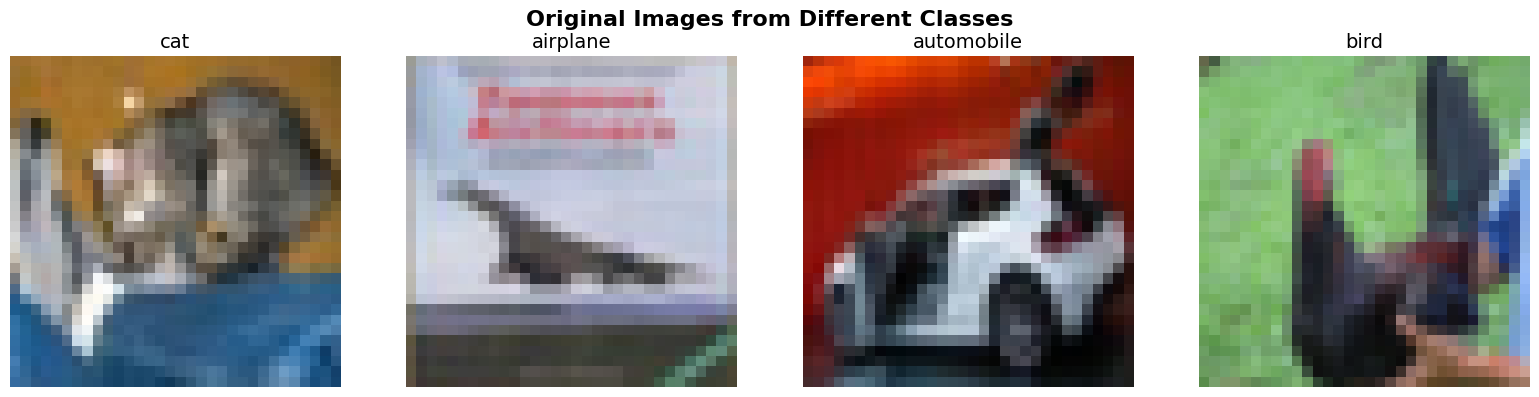


📊 How the same filters respond to different images:


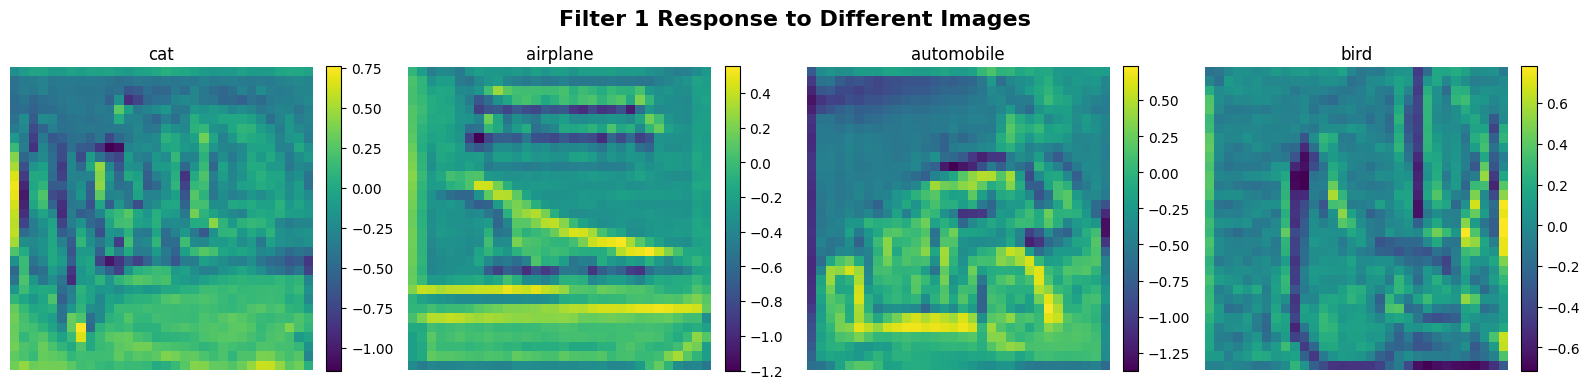

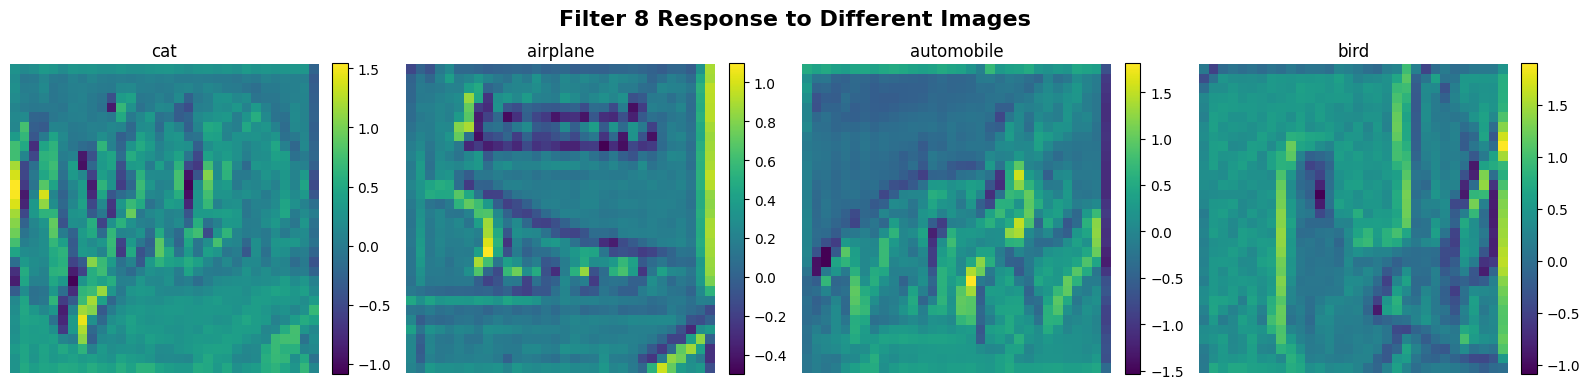

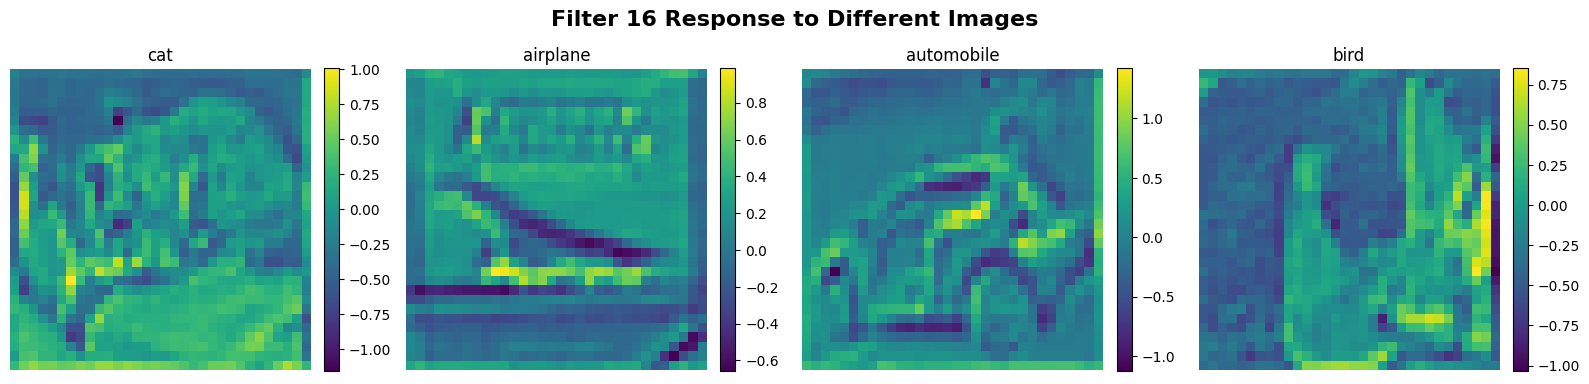

🎯 Key Insights:
   - Same filter responds differently to different images
   - Some filters are activated by edges, others by textures
   - Animals might activate different filters than vehicles
   - This is how CNNs learn to distinguish between classes!


In [29]:
# Let's see how different filters respond to different types of images
print("🔍 Comparing how filters respond to different image types:")

# Get images from different classes
cifar_cnn.eval()
different_classes = []
different_images = []
different_labels = []

# Look for specific classes to show interesting comparisons
target_classes = ['airplane', 'cat', 'automobile', 'bird']
found_classes = []

for data, target in cifar_test_loader:
    for i in range(len(target)):
        class_name = classes[target[i]]
        if class_name in target_classes and class_name not in found_classes:
            different_images.append(data[i:i+1])
            different_labels.append(class_name)
            found_classes.append(class_name)
            if len(found_classes) >= 4:
                break
    if len(found_classes) >= 4:
        break

print(f"Found images for: {found_classes}")

# Show original images
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Original Images from Different Classes', fontsize=16, fontweight='bold')

for i in range(4):
    # Prepare image for display
    img = different_images[i][0].permute(1, 2, 0)
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    img = torch.clamp(img, 0, 1)
    
    axes[i].imshow(img)
    axes[i].set_title(f'{different_labels[i]}', fontsize=14)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Now show how the same filters respond to these different images
print("\n📊 How the same filters respond to different images:")

# Choose 3 interesting filters to compare
interesting_filters = [0, 7, 15]  # You can change these numbers

for filter_idx in interesting_filters:
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle(f'Filter {filter_idx+1} Response to Different Images', fontsize=16, fontweight='bold')
    
    for i in range(4):
        # Get feature map for this image
        img_tensor = different_images[i].to(device)
        feature_maps = get_feature_maps(cifar_cnn, img_tensor, 'conv1')
        feature_map = feature_maps[0, filter_idx].cpu().numpy()
        
        # Show the feature map
        im = axes[i].imshow(feature_map, cmap='viridis')
        axes[i].set_title(f'{different_labels[i]}', fontsize=12)
        axes[i].axis('off')
        
        # Add colorbar
        plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
    
    plt.tight_layout()
    plt.show()

print("🎯 Key Insights:")
print("   - Same filter responds differently to different images")
print("   - Some filters are activated by edges, others by textures")
print("   - Animals might activate different filters than vehicles")
print("   - This is how CNNs learn to distinguish between classes!")

## Part 6: Key Takeaways and Practical Applications

**What we've learned:**

1. **Fully Connected Networks** work for simple images like MNIST but have major limitations:
   - Too many parameters for large images
   - Ignore spatial relationships
   - Not efficient for image data

2. **Convolutional Neural Networks** are specifically designed for images:
   - Use convolution operations to detect features
   - Share parameters across the image (efficiency)
   - Preserve spatial relationships
   - Translation invariant (recognize objects anywhere)

3. **Real-world performance**: CNNs dramatically outperform traditional networks on complex image tasks

**Where CNNs are used today:**
- **Medical imaging**: Cancer detection, X-ray analysis
- **Autonomous vehicles**: Object detection, lane recognition
- **Social media**: Photo tagging, content moderation
- **Security**: Face recognition, surveillance
- **Agriculture**: Crop monitoring, pest detection
- **Art and creativity**: Style transfer, image generation

**Key advantages of CNNs:**
- Designed for image data
- Efficient parameter sharing
- Hierarchical feature learning
- Translation invariant
- Scalable to large images

## Experiments to Try! 🧪

Now it's your turn to experiment! Try modifying the code above to explore different aspects:

### Easy Experiments:
1. **Change learning rates**: Try `lr=0.01` or `lr=0.0001` in the optimizers
2. **Modify dropout**: Change the dropout values (0.1, 0.5, 0.7)
3. **Different batch sizes**: Try 32, 128, or 256 in the DataLoaders
4. **More epochs**: Train for longer and see how accuracy changes

### Medium Experiments:
1. **Add more layers**: Add another convolutional layer to the CNN
2. **Change filter sizes**: Try 5×5 or 7×7 filters instead of 3×3
3. **Different optimizers**: Try `optim.SGD` instead of `optim.Adam`
4. **Data augmentation**: Add random rotations or flips to training data

### Advanced Experiments:
1. **Build a deeper network**: Create a network with 5+ convolutional layers
2. **Transfer learning**: Use a pre-trained network from torchvision.models
3. **Different datasets**: Try Fashion-MNIST or CIFAR-100
4. **Visualize feature maps**: Show what intermediate layers detect

### Discussion Questions:
1. Why do CNNs work better than fully connected networks for images?
2. What would happen if we used a CNN on non-image data?
3. How might you modify the network for medical image analysis?
4. What are the trade-offs between network depth and training time?

**Remember**: Each experiment teaches you something about how neural networks learn!